In [161]:
import torch
import torch_geometric as pyg
import torch.nn as nn
import torch_geometric.nn as gnn
from torch_geometric.datasets import Planetoid, Amazon, KarateClub, TUDataset
from torch_geometric.utils import train_test_split_edges, add_self_loops, negative_sampling
from torch_geometric.transforms import RandomLinkSplit, RandomNodeSplit
import torch.optim as optim
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import loaders
import importlib
importlib.reload(loaders)
from loaders import Loader, LoaderInductive, LoaderTransductive, Element
import random
import numpy as np
import torch.nn.functional as F
from torch_geometric.data import Data
from trainers import Trainer, LinkClassification, LinkPrediction
from GNN import GINLayer, MyGNN
from datasets import LinkClassificationDataset, LinkPredictionDataset
from general import set_seed
import urllib3
urllib3.disable_warnings()

In [162]:
set_seed(42)

In [163]:
dataset = LinkClassificationDataset()
data = dataset.get_data()

In [164]:
data.edge_attr.max()

tensor(3)

In [165]:
loader : Loader = LoaderInductive(data, data.edge_attr)

In [166]:
in_features = data.x.shape[-1]
hidden_features = 64
num_layers = 4
dropout = 0.2

In [167]:
out_features = torch.max(loader.data.edge_classes).item() + 1 if isinstance(dataset, LinkClassificationDataset) else 1
model = MyGNN(in_features, hidden_features, out_features, num_layers=num_layers, dropout=dropout)

In [168]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
trainer: Trainer = LinkClassification(model, optimizer, loader)
trainer.train(200, 10)

Epoch: 1 | Loss: 1.469 | Val Loss: 1.197 | Val accuracy: 0.543
Epoch: 2 | Loss: 1.197 | Val Loss: 1.121 | Val accuracy: 0.543
Epoch: 3 | Loss: 1.090 | Val Loss: 1.073 | Val accuracy: 0.543
Epoch: 4 | Loss: 1.022 | Val Loss: 1.052 | Val accuracy: 0.543
Epoch: 5 | Loss: 0.973 | Val Loss: 1.049 | Val accuracy: 0.543
Epoch: 6 | Loss: 0.938 | Val Loss: 1.041 | Val accuracy: 0.543
Epoch: 7 | Loss: 0.916 | Val Loss: 1.020 | Val accuracy: 0.543
Epoch: 8 | Loss: 0.893 | Val Loss: 0.983 | Val accuracy: 0.543
Epoch: 9 | Loss: 0.869 | Val Loss: 0.932 | Val accuracy: 0.543
Epoch: 10 | Loss: 0.837 | Val Loss: 0.877 | Val accuracy: 0.598
Epoch: 11 | Loss: 0.794 | Val Loss: 0.841 | Val accuracy: 0.677
Epoch: 12 | Loss: 0.751 | Val Loss: 0.814 | Val accuracy: 0.709
Epoch: 13 | Loss: 0.712 | Val Loss: 0.774 | Val accuracy: 0.717
Epoch: 14 | Loss: 0.680 | Val Loss: 0.730 | Val accuracy: 0.705
Epoch: 15 | Loss: 0.669 | Val Loss: 0.744 | Val accuracy: 0.701
Epoch: 16 | Loss: 0.656 | Val Loss: 0.766 | Val a

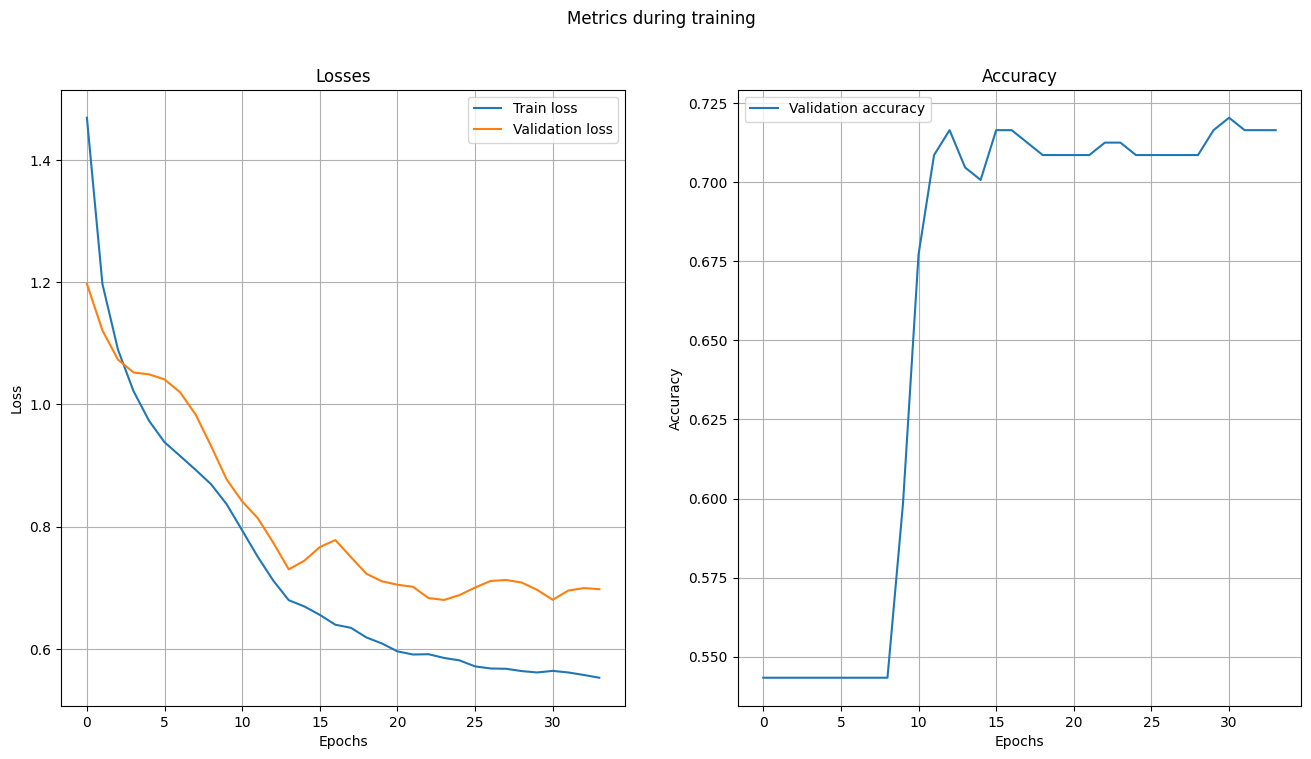

In [169]:
trainer.plot_train_history()

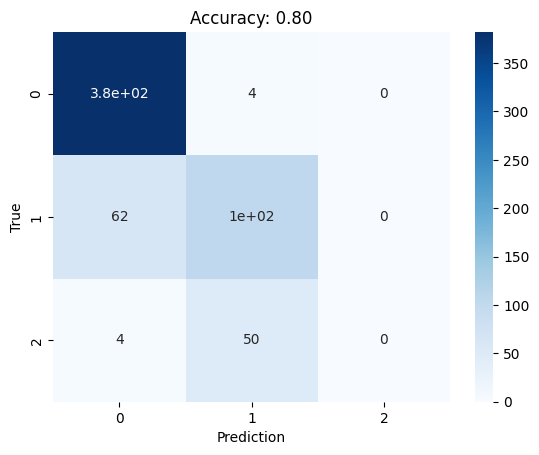

In [170]:
trainer.evaluate_test_set()